# Proof of Concept: 
## Default Categories in Three Different Courses

This notebook demonstrates the full pipeline implemented in the package, illustrating a potential use case in the absence of real data.
In this case, it simulates a researcher who is investigating 30 students' usage of chatbots in three different settings: an English, Biology, and Spanish course. 
The framework used to do so is from XXX, and the researcher is looking into the intentions behind the interactions of both the students and the chatbot.

The steps to do so are as follows:
1. A synthetic framework (i.e., an annotated dataset) is first generated.
2. Next, an interaction is simulated between two agents representing a 'student' and a 'tutor'.
3. A BERT classifier is then trained on the synthesized data. 
4. The trained classifier is then applied to the simulated conversation. In this case, both agents' outputs are analyzed.
5. Finally, the classified data is presented in a descriptive format, showcasing the researchers results. 

In [3]:
pip install --upgrade educhateval

  Using cached educhateval-0.1.3-py3-none-any.whl.metadata (6.5 kB)
Using cached educhateval-0.1.3-py3-none-any.whl (47 kB)
  Attempting uninstall: educhateval
    Found existing installation: educhateval 0.1.1
    Uninstalling educhateval-0.1.1:
      Successfully uninstalled educhateval-0.1.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
from educhateval import FrameworkGenerator, DialogueSimulator

In [6]:
generator = FrameworkGenerator(model_name="DeepSeek-R1-Distill-Llama-8B", api_url="http://localhost:1234/v1/completions")
df_4 = generator.generate_framework(
    prompt_path="/Users/dklaupaa/Desktop/chat_wrap_package/src/educhateval/framework_generation/outline_prompts/prompt_default_4types.py", 
    num_samples=5, 
    csv_out="/Users/dklaupaa/Downloads/TEST.csv"
)

Generating for category: Clarification
Generating for category: Small Talk
Generating for category: Question
Generating for category: Statement
Number of duplicates removed: 2
→ Saved CSV: /Users/dklaupaa/Downloads/TEST.csv


In [5]:
simulator = DialogueSimulator(backend="mlx", model_id="mlx-community/Qwen2.5-7B-Instruct-1M-4bit")

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
simulator_hf = DialogueSimulator(backend="hf", model_id="microsoft/Phi-3.5-mini-instruct")

tokenizer_config.json:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.45k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/195 [00:00<?, ?B/s]

Some parameters are on the meta device because they were offloaded to the disk.


In [6]:
seed_message = "Hi, I'm a student seeking assistance with my studies in English." # example input - same as default

df_single = simulator.simulate_dialogue(
    mode="general_task_solving",
    turns=5,
    seed_message_input=seed_message
    #save_csv_path=Path("output/dialogue.csv")
)


--- Starting Dialogue Simulation ---

[Student]: Hi, I'm a student seeking assistance with my studies in English.


mx.metal.set_wired_limt is deprecated and will be removed in a future version. Use mx.set_wired_limit instead.
mx.metal.get_peak_memory is deprecated and will be removed in a future version. Use mx.get_peak_memory instead.
mx.metal.clear_cache is deprecated and will be removed in a future version. Use mx.clear_cache instead.


[Tutor]: Hello! I'm here to help. What specific area of English are you studying or what do you need assistance with?

Turn 2:
[Student]: Could you please give me an example of the type of English problem or question I might be facing?
[Tutor]: Sure! For example, you might be struggling with grammar, vocabulary, essay writing, or understanding a particular passage. What specific challenge are you facing?

Turn 3:
[Student]: Could you provide an example of a sentence or a passage where I might be having trouble understanding it?
[Tutor]: Of course! Here's a sentence: "Though the storm had passed, the city remained in chaos."

Can you identify the type of sentence it is or explain its meaning? Let me know where you're feeling unsure!

Turn 4:
[Student]: Could you explain why the sentence uses "Though" at the beginning? I'm not sure how it changes the meaning compared to starting with "After the storm had passed."
[Tutor]: The "Though" at the beginning indicates a contrast. It sets up a s

In [8]:
from educhateval import PredictLabels

In [9]:
# loading the model and data for prediction
predictor = PredictLabels(model_name="distilbert/distilroberta-base")

In [12]:
annotaded_df = predictor.run_pipeline(
    train_data="/Users/dklaupaa/Desktop/chat_wrap_package/data/generated_tuning_data/final_qual_default.csv", 
    new_data="/Users/dklaupaa/Desktop/chat_wrap_package/data/generated_dialogue_data/synth_english_interaction.csv", 
    # column names in training data:
    text_column="text",
    label_column="category", 
    # column names in data to be predicted:
    columns_to_classify=["student_msg", "tutor_msg"], 
    split_ratio = 0.20,
    prediction_save_path="/Users/dklaupaa/Desktop/chat_wrap_package/data/final_outputs/TESTING_english_annotated.csv"
)

Max token: 45 Average token: 18.310576923076923


Map:   0%|          | 0/1040 [00:00<?, ? examples/s]

Map:   0%|          | 0/261 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilbert/distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.000638,1.000000,1.000000,1.000000,1.000000
2,No log,0.000402,1.000000,1.000000,1.000000,1.000000
3,No log,0.000257,1.000000,1.000000,1.000000,1.000000
4,0.056900,0.000229,1.000000,1.000000,1.000000,1.000000


Predicted data saved to /Users/dklaupaa/Desktop/chat_wrap_package/data/final_outputs/TESTING_english_annotated.csv


In [13]:
annotaded_df

,turn,student_msg,tutor_msg,student_id,course,predicted_labels_student_msg,predicted_labels_tutor_msg
0,1,"Hi, I'm struggling with writing essays. Can yo...",Absolutely! Let's start by focusing on structu...,english_course_student_1,english_course,Clarification,Clarification
1,2,"Sure, let's start with the introduction. Could...","Sure! How about this topic: ""The Impact of Soc...",english_course_student_1,english_course,Clarification,Clarification
2,3,"Got it! So for my introduction, I should start...","Exactly! Try this thesis: ""While social media ...",english_course_student_1,english_course,Clarification,Clarification
3,4,Thank you! That sounds good. Could you give me...,"Sure! How about: ""Despite claims of fostering ...",english_course_student_1,english_course,Clarification,Question
4,5,Great! Thanks for the examples. One more thing...,Great question! Start each paragraph with a cl...,english_course_student_1,english_course,Clarification,Clarification
...,...,...,...,...,...,...,...
235,4,"Thank you. Could you clarify the theme of ""con...","Sure! In ""The Lottery,"" conformity is key. The...",english_course_student_30,english_course,Clarification,Statement
236,5,That's helpful. Could you give me an example f...,"Absolutely! Early in the story, Mrs. Dunwich m...",english_course_student_30,english_course,Clarification,Statement
237,6,Got it. And how about the role of the lottery ...,The lottery symbolizes random violence and the...,english_course_student_30,english_course,Question,Statement
238,7,That makes sense. Thank you! One last question...,Great question! The story explores mob mentali...,english_course_student_30,english_course,Clarification,Statement


In [15]:
from educhateval import Visualizer

viz = Visualizer()

  Predicted Category  Student (n) Student (%)  Tutor (n) Tutor (%)
0      Clarification          177       73.8%         78     32.5%
1           Question           16        6.7%         15      6.2%
2         Small Talk           46       19.2%         62     25.8%
3          Statement            1        0.4%         85     35.4%


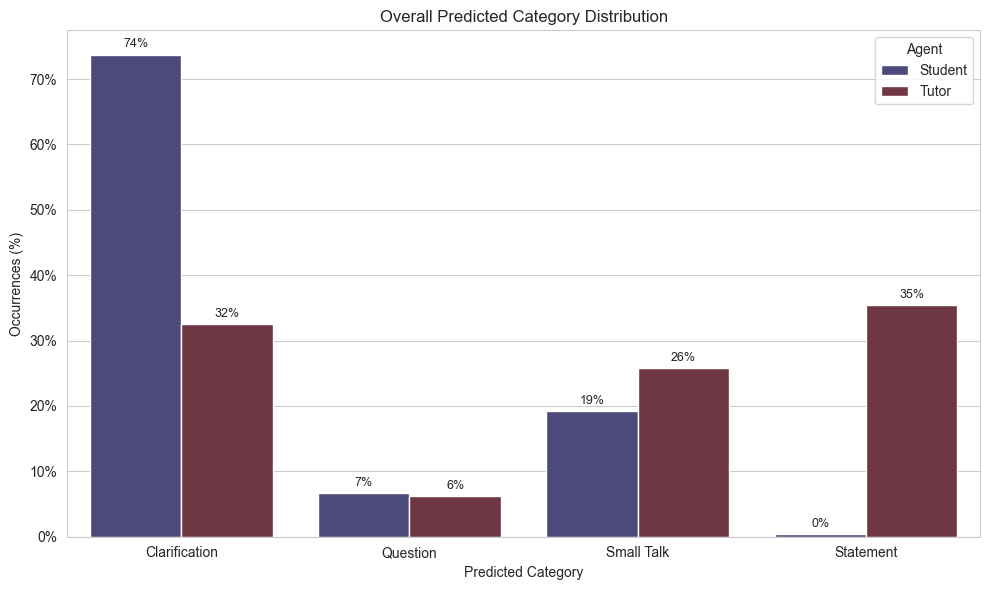

In [17]:
# Summary table
summary = viz.create_summary_table(
    df=annotaded_df, 
    label_columns=["predicted_labels_student_msg","predicted_labels_tutor_msg"])

print(summary)

# Simple bar plot visualising the table 
viz.plot_category_bars(
    df=annotaded_df,
    label_columns=["predicted_labels_student_msg", "predicted_labels_tutor_msg"],
    use_percent=True,
    title="Overall Predicted Category Distribution"
)


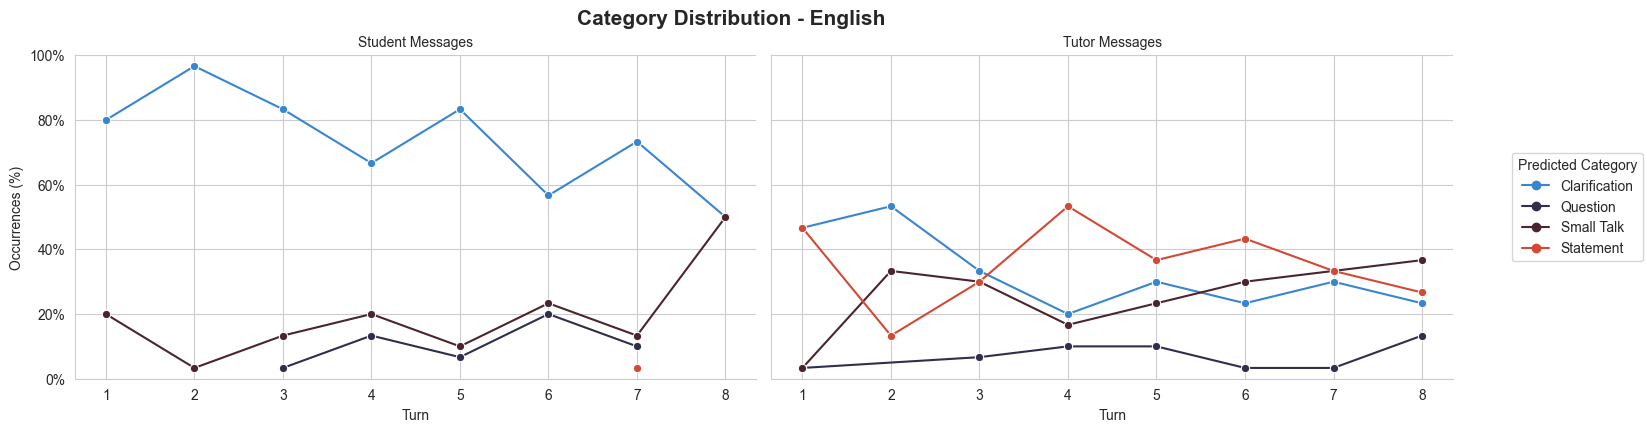

In [19]:
# Plot category distribution over turns
viz.plot_turn_trends(
    df=annotaded_df,
    label_columns=["predicted_labels_student_msg", "predicted_labels_tutor_msg"], 
    title="Category Distribution - English"
)


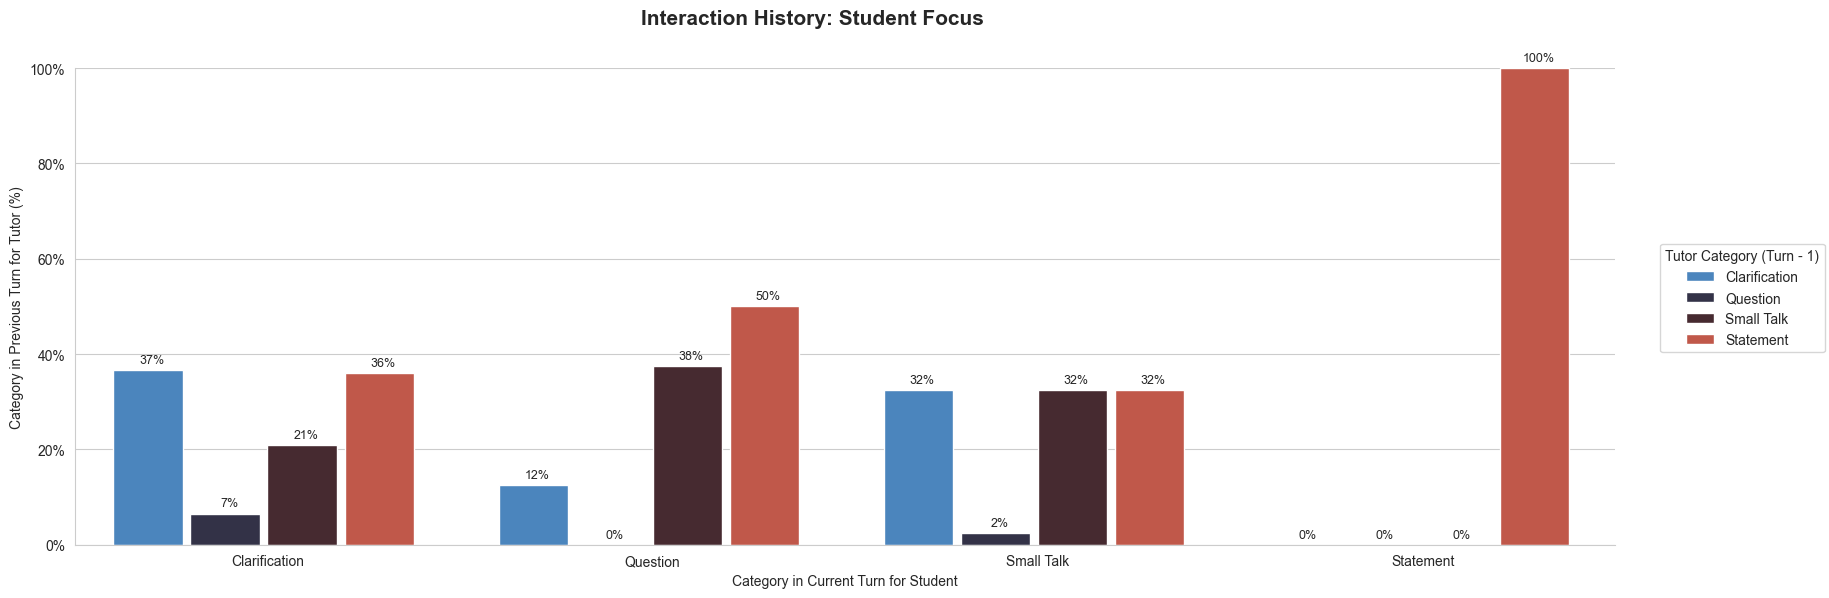

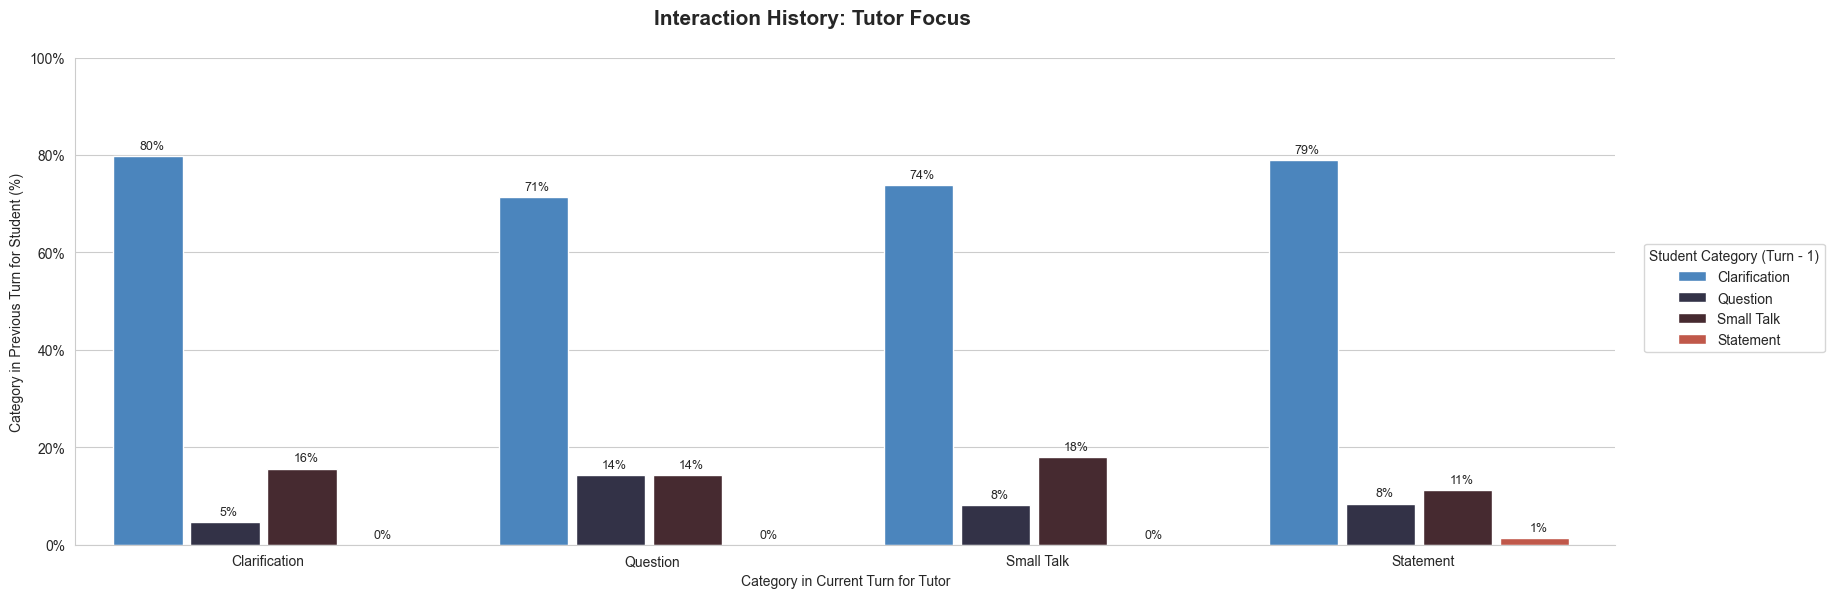

In [21]:
viz.plot_history_interaction(
    df=annotaded_df,
    focus_agent='student', 
    use_percent=True
)

viz.plot_history_interaction(
    df=annotaded_df,
    focus_agent='tutor',  
    use_percent=True
)

